<a href="https://colab.research.google.com/github/GigiQR99/CV-Class3-Streamlit/blob/main/CV_Week3_ELee_Threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/fenago/cv2

Cloning into 'cv2'...
remote: Enumerating objects: 355, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 355 (delta 36), reused 13 (delta 13), pack-reused 311 (from 2)
Receiving objects: 100% (355/355), 145.33 MiB | 31.68 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Updating files: 100% (240/240), done.


## Key Skills You'll Master:
- Understand what image thresholding is and why it's crucial in computer vision
- Apply global thresholding to isolate specific features like road lanes
- Use adaptive thresholding for images with varying lighting conditions
- Create binary images for follow-on processing tasks
- Choose the right threshold values for different applications
- Handle challenging scenarios like sheet music with shadows
- Understand the difference between THRESH_BINARY and THRESH_BINARY_INV
- Build foundations for applications like lane detection and OCR

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

# 1. Global Thresholding
<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Binary images are used extensively in computer vision applications, as they allow you to selectively process specific regions of an image, keeping the other regions intact. Image thresholding is used to create binary images from grayscale images. You can use different thresholds to create different binary images from the same original image using the **`threshold()`** function.

### <font color="green">Function Syntax </font>

``` python
retval, dst = cv2.threshold(src, thresh, maxval, type[, dst])
```

`dst`: The output array of the same size and type and the same number of channels as `src`.

The function has **4 required arguments**:

1. `src`: input array (multiple-channel, 8-bit or 32-bit floating point).
2. `thresh`: threshold value.
3. `maxval`: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.
4. `type`: thresholding type (see ThresholdTypes).


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`threshold()`**](https://docs.opencv.org/4.5.2/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57)
[**`threshold tutorial`**](https://docs.opencv.org/4.5.2/d7/d4d/tutorial_py_thresholding.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Text(0.5, 1.0, 'Thresholded')

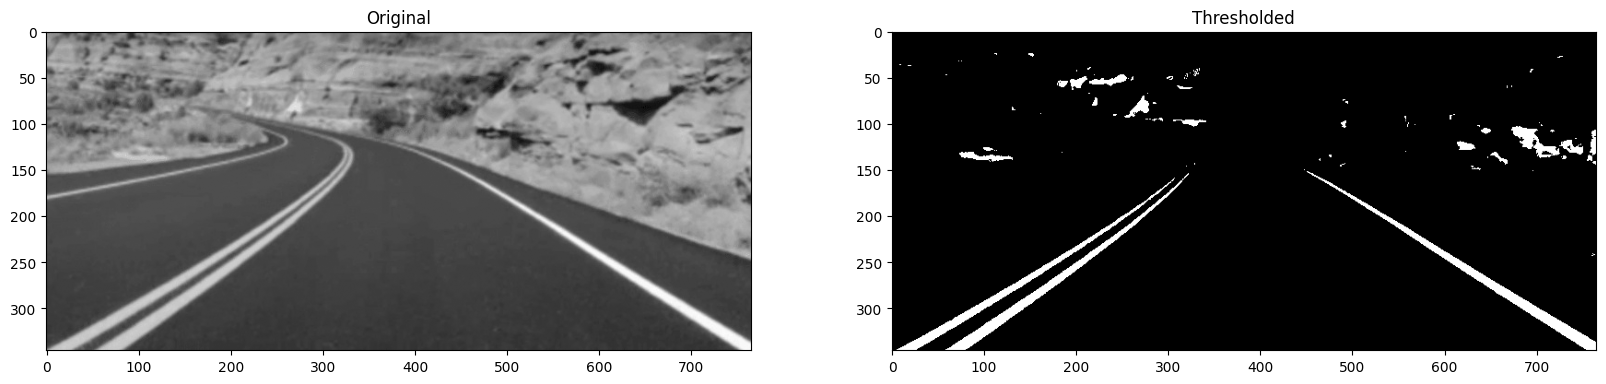

In [ ]:
# Read image in grayscale.
img = cv2.imread('/content/cv2/Mod2/road_lanes.png', cv2.IMREAD_GRAYSCALE)

# Perform binary thresholding.
retval, img_thresh = cv2.threshold(img, 165, 255, cv2.THRESH_BINARY)

# Display the images.
plt.figure(figsize = [20, 8])
plt.subplot(121); plt.imshow(img); plt.title('Original')
plt.subplot(122); plt.imshow(img_thresh); plt.title('Thresholded')

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax </font>

``` python
dst = cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst])
```

`dst`	Destination image of the same size and the same type as src.

The function has **6 required arguments**:
1. `src`:	Source 8-bit single-channel image.

2. `maxValue`:	Non-zero value assigned to the pixels for which the condition is satisfied
3. `adaptiveMethod`:	Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.
4. `thresholdType:`	Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.
5. `blockSize`:	Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
6. `C`:	Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`adaptiveThreshold()`**](https://docs.opencv.org/4.5.2/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3)
[**`threshold tutorial`**](https://docs.opencv.org/4.5.2/d7/d4d/tutorial_py_thresholding.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Text(0.5, 1.0, 'Thresholded (adaptive)')

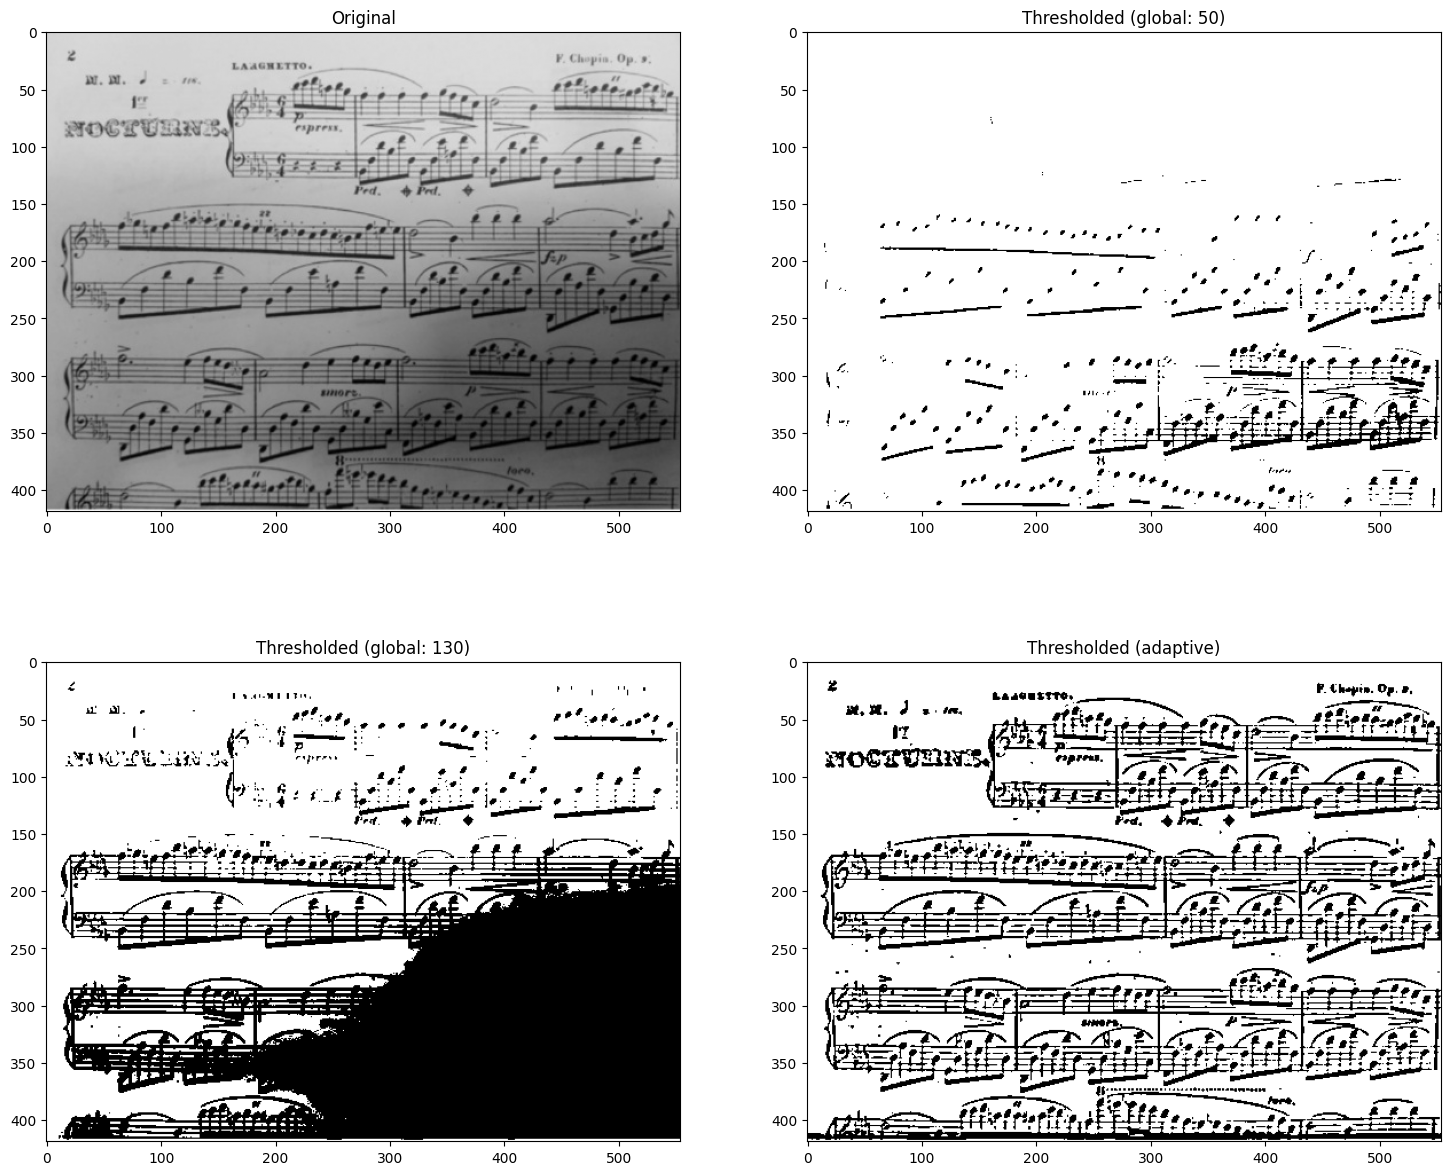

In [ ]:
# Read the original image.
img = cv2.imread('/content/cv2/Mod2/Piano_Sheet_Music.png', cv2.IMREAD_GRAYSCALE)

# Perform global thresholding.
retval, img_thresh_gbl_1 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

# Perform global thresholding.
retval, img_thresh_gbl_2 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding.
img_thresh_adp = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)

# Display the images.
plt.figure(figsize = [18, 15])
plt.subplot(221); plt.imshow(img);              plt.title('Original')
plt.subplot(222); plt.imshow(img_thresh_gbl_1); plt.title('Thresholded (global: 50)')
plt.subplot(223); plt.imshow(img_thresh_gbl_2); plt.title('Thresholded (global: 130)')
plt.subplot(224); plt.imshow(img_thresh_adp);   plt.title('Thresholded (adaptive)')

Text(0.5, 1.0, 'Thresholded (global)')

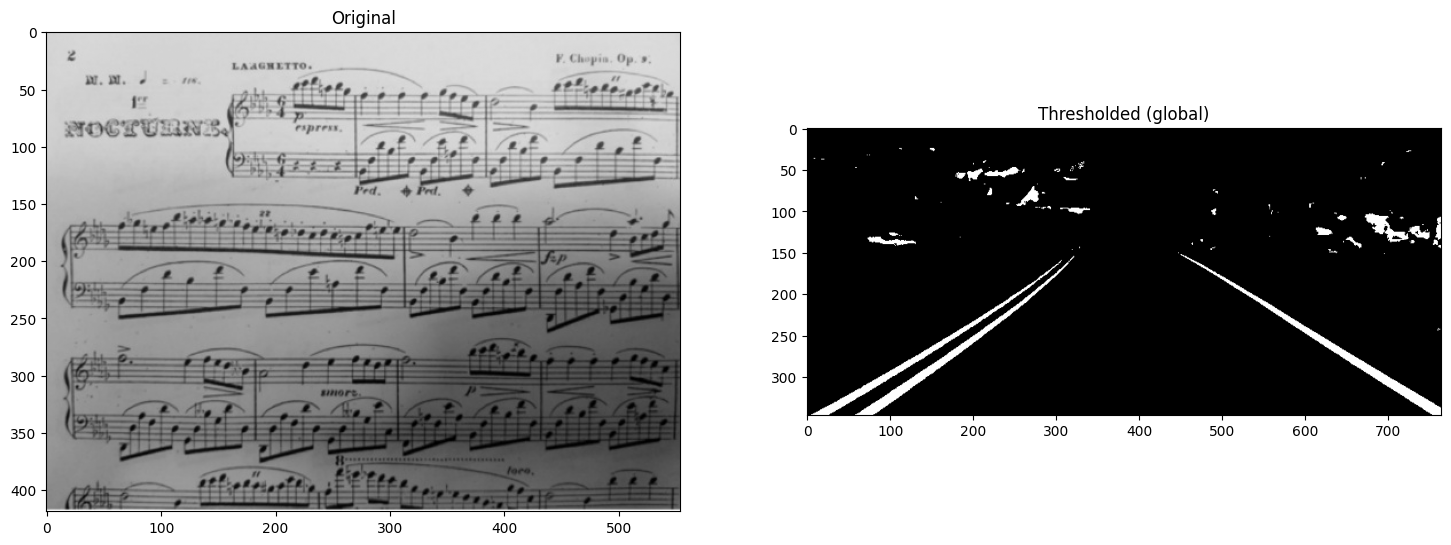

In [ ]:
img = cv2.imread('/content/cv2/Mod2/Piano_Sheet_Music.png', cv2.IMREAD_GRAYSCALE)

# Perform global thresholding (find the best global threshold that isolates the music from the shadows).
# Use a threshold type of: cv2.THRESH_BINARY_INV
# YOUR CODE HERE
# retval, img_thresh =

# Display the images.
# UNCOMMENT the lines below.
plt.figure(figsize = [18,15])
plt.subplot(121); plt.imshow(img);        plt.title('Original')
plt.subplot(122); plt.imshow(img_thresh); plt.title('Thresholded (global)')

# Logical Operations
- AND, OR, XOR and NOT
- Apply bitwise operations to images for creative effects
- Work with binary notation and pixel intensities
- Create and use binary masks for selective image processing
- Combine multiple images using logical operations
- Manipulate logos and graphics with masking techniques
- Build foundations for color segmentation and filtering
- Understand the role of masks in computer vision pipelines

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

(200, 499)


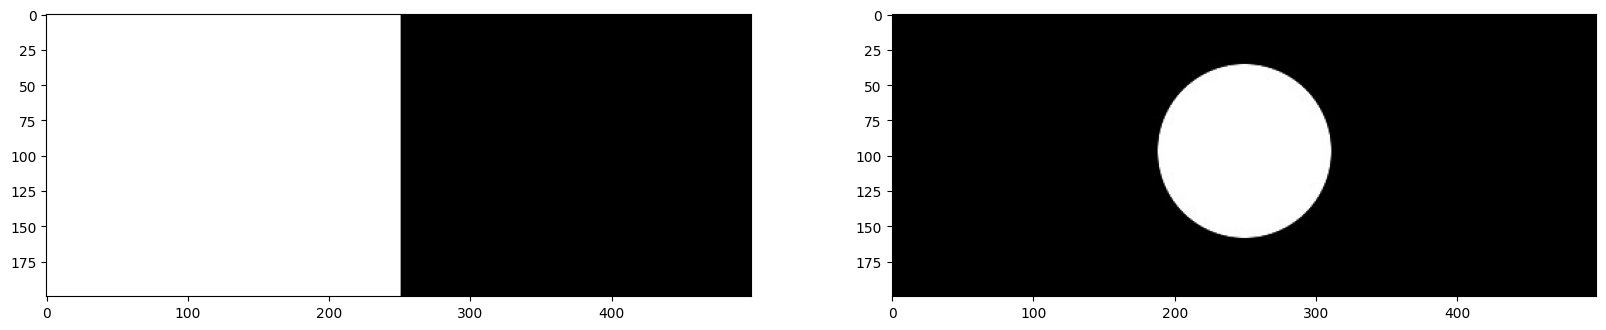

In [ ]:
img_rec = cv2.imread('/content/cv2/Mod2/rectangle.jpg', cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread('/content/cv2/Mod2/circle.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = [20,5])
plt.subplot(121);  plt.imshow(img_rec);
plt.subplot(122);  plt.imshow(img_cir);
print(img_rec.shape)

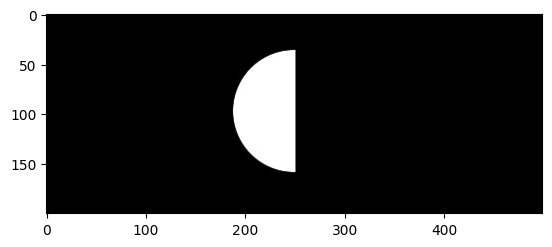

In [ ]:
result = cv2.bitwise_and(img_rec, img_cir, mask = None)

plt.imshow(result);

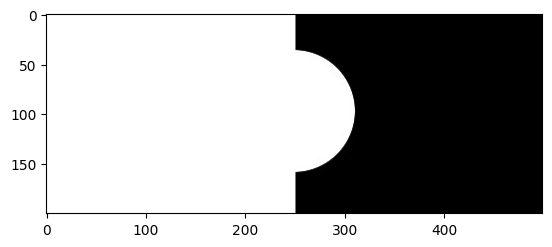

In [ ]:
result = cv2.bitwise_or(img_rec, img_cir, mask = None)
plt.imshow(result);

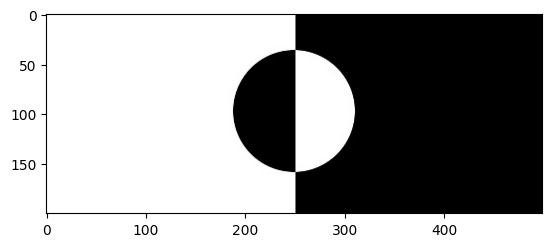

In [ ]:
result = cv2.bitwise_xor(img_rec, img_cir, mask = None)
plt.imshow(result);

(500, 500, 3)


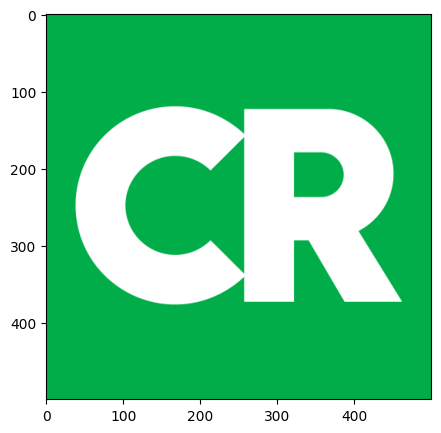

In [ ]:
# Read the of image of color CR logo (foreground).
img_logo = cv2.imread('/content/cv2/Mod2/CR_Logo.png', cv2.IMREAD_COLOR)

# Print the image shape.
print(img_logo.shape)
logo_h = img_logo.shape[0]
logo_w = img_logo.shape[1]

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_logo[:, :, ::-1]);

In [ ]:
# Read the of image of color cheackerboad (background).
img_background = cv2.imread('/content/cv2/Mod2/checkerboard_color.png', cv2.IMREAD_COLOR)

# Print the image shape.
print(img_background.shape);

(900, 900, 3)


(500, 500, 3)


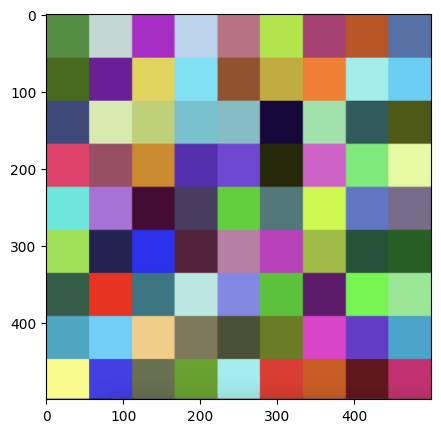

In [ ]:
# Set the dimension of the background image to be the same as the logo.
dim = (logo_w, logo_h)

# Resize the background image to the same size as logo image.
img_background = cv2.resize(img_background, dim, interpolation = cv2.INTER_AREA)

# Print the image shape to confirm it's the same size as the logo.
print(img_background.shape)

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_background[:, :, ::-1]);

(500, 500)


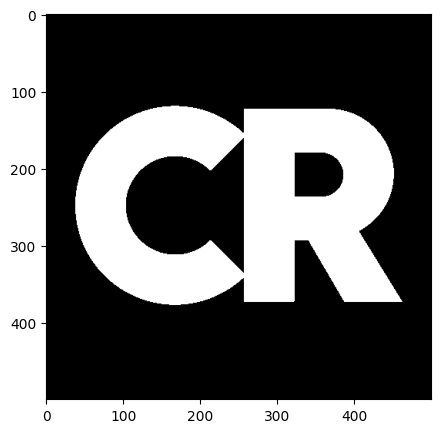

In [ ]:
# Convert the image to grayscale.
img_logo_gray = cv2.cvtColor(img_logo, cv2.COLOR_BGR2GRAY)

# Apply global thresholding to create a binary mask of the logo.
retval, img_logo_mask = cv2.threshold(img_logo_gray, 127, 255, cv2.THRESH_BINARY)

# Print the image shape.
print(img_logo_mask.shape);

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_logo_mask);

(500, 500, 3)


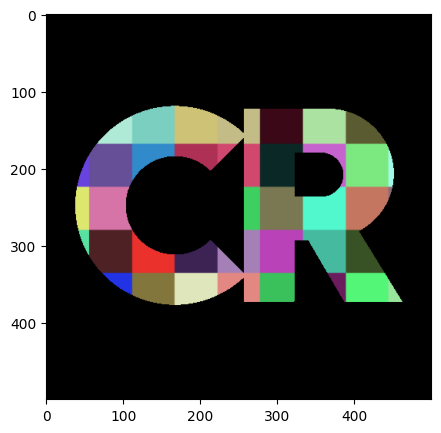

In [ ]:
# Create colorful checkerboard background "behind" the logo lettering.
img_background = cv2.bitwise_and(img_background, img_background, mask = img_logo_mask)

# Print the image shape.
print(img_background.shape);

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_background);

(500, 500)


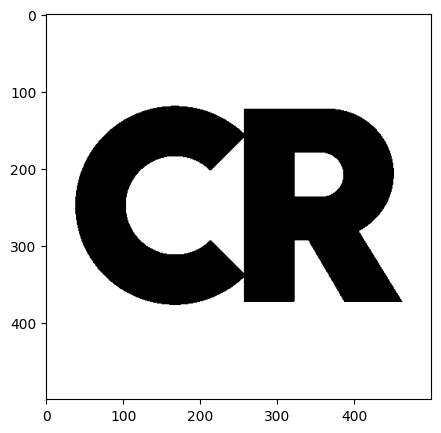

In [ ]:
# Create an inverse mask.
img_logo_mask_inv = cv2.bitwise_not(img_logo_mask)

# Print the image shape.
print(img_logo_mask_inv.shape)

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_logo_mask_inv);

(500, 500, 3)


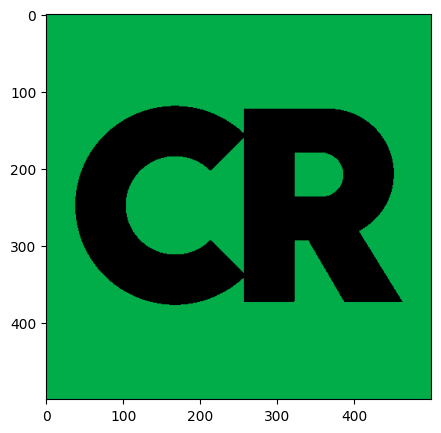

In [ ]:
# Isolate the foreground using the inverse mask.
img_foreground = cv2.bitwise_and(img_logo, img_logo, mask = img_logo_mask_inv)

# Print the image shape.
print(img_foreground.shape)

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_foreground[...,::-1]);

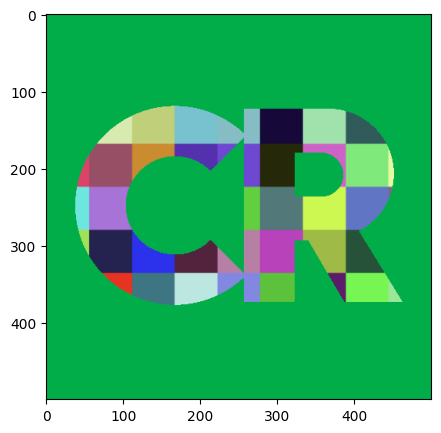

In [ ]:
# Add the two previous results to obtain the final result.
result = cv2.add(img_background,img_foreground)

# Display the image and save the the result to the file system.
plt.figure(figsize = [5, 5])
plt.imshow(result[:, :, ::-1])
cv2.imwrite('logo_final.png', result);

# Transparancy AKA the Alpha Channel

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from IPython.display import Image
plt.rcParams['image.cmap'] = 'gray'

(2436, 2623, 4)


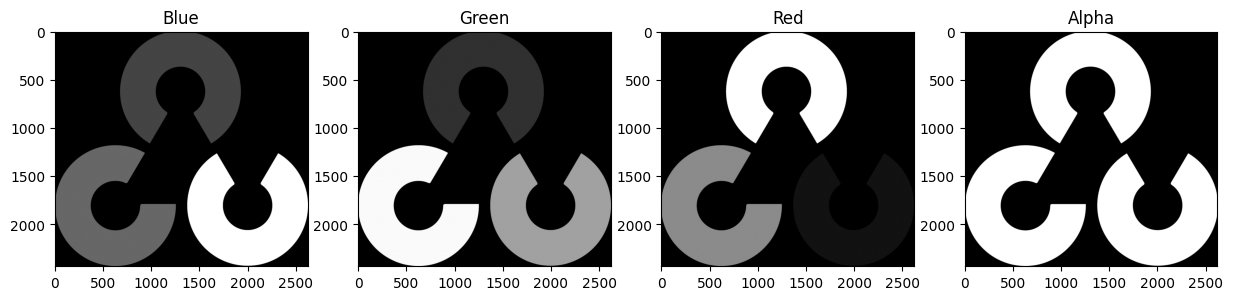

In [ ]:
# Read the PNG image using: cv2.IMREAD_UNCHANGED to retain the alpha channel.
img = cv2.imread('/content/cv2/Mod2/opencv_logo.png', cv2.IMREAD_UNCHANGED)

print(img.shape)

# Split the channels.
b, g, r, a = cv2.split(img)

# Display eazch of the channels.
plt.figure(figsize = (15,15))
plt.subplot(141); plt.imshow(b); plt.title('Blue')
plt.subplot(142); plt.imshow(g); plt.title('Green')
plt.subplot(143); plt.imshow(r); plt.title('Red')
plt.subplot(144); plt.imshow(a); plt.title('Alpha');

Shape of the color image:  (640, 640, 3)


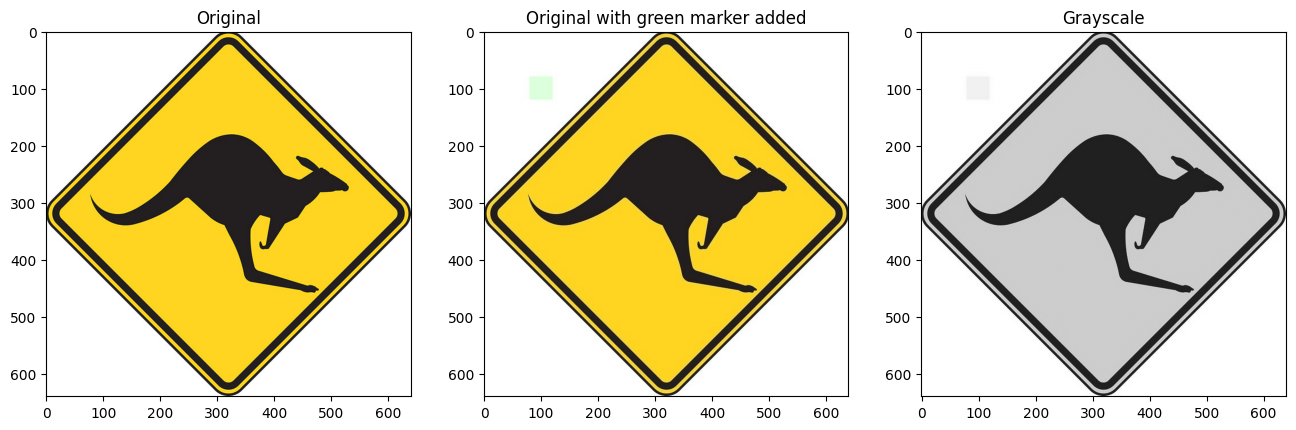

In [ ]:
# Read the original and modified JPG images of the kangaroo sign.
img_kang_org = cv2.imread('/content/cv2/Mod2/kangaroo.jpg',cv2.IMREAD_COLOR)
img_kang = cv2.imread('/content/cv2/Mod2/kangaroo_sign_with_green_marker.jpg',cv2.IMREAD_COLOR)

# For reference: Code used to add light green marker to original image of the kangaroo sign.
# img_kang_org[80:120,80:120,0] = 220
# img_kang_org[80:120,80:120,1] = 255
# img_kang_org[80:120,80:120,2] = 220
# cv2.imwrite('kangaroo_sign_with_green_marker.jpg', img_kang_org)

# Print the image shapes to verify the channels.
print('Shape of the color image: ', img_kang.shape)

# Convert the image to gray scale.
img_kang_gray = cv2.cvtColor(img_kang, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (16,10))
plt.subplot(131); plt.imshow(img_kang_org[:, :, ::-1]); plt.title('Original')
plt.subplot(132); plt.imshow(img_kang[:, :, ::-1]);     plt.title('Original with green marker added')
plt.subplot(133); plt.imshow(img_kang_gray);            plt.title('Grayscale');

Inverse Mask (full) at (100,100):  0
Inverse Mask (semi) at (100,100):  55


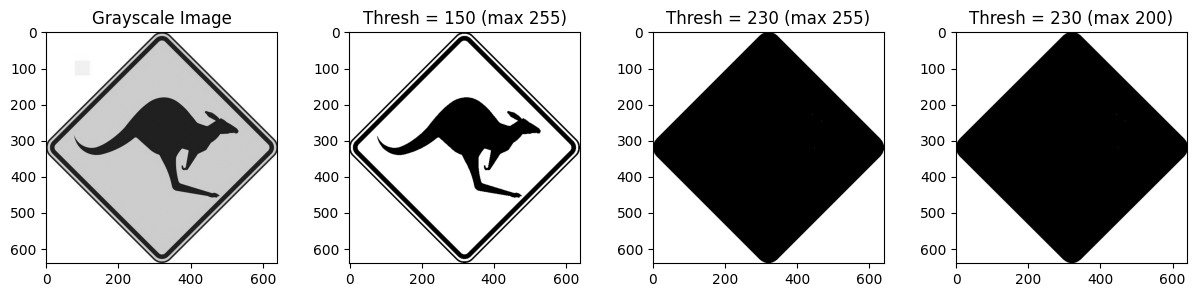

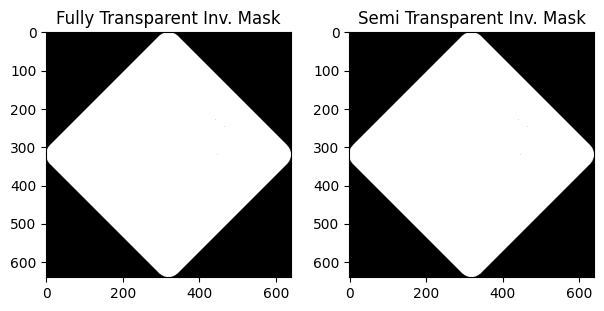

In [ ]:
ret1, thresh1 = cv2.threshold(img_kang_gray, 150, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(img_kang_gray, 230, 255, cv2.THRESH_BINARY)
ret3, thresh3 = cv2.threshold(img_kang_gray, 230, 200, cv2.THRESH_BINARY)  # Note max value of mask is set to 200

kang_inv_mask_full = cv2.bitwise_not(thresh2)  # Fully transparent
kang_inv_mask_semi = cv2.bitwise_not(thresh3)  # Semi-transparent (due to max value of thresh3 = 200)

# Print the pixel itensity of the inverted binary masks at the location (100,100).
print('Inverse Mask (full) at (100,100): ', kang_inv_mask_full[100,100])
print('Inverse Mask (semi) at (100,100): ', kang_inv_mask_semi[100,100])

plt.figure(figsize = (15, 3))
plt.subplot(141); plt.imshow(img_kang_gray);  plt.title('Grayscale Image')
plt.subplot(142); plt.imshow(thresh1); plt.title('Thresh = 150 (max 255)')
plt.subplot(143); plt.imshow(thresh2); plt.title('Thresh = 230 (max 255)')
plt.subplot(144); plt.imshow(thresh3); plt.title('Thresh = 230 (max 200)')

plt.figure(figsize = (15, 7))
plt.subplot(245); plt.imshow(kang_inv_mask_full); plt.title('Fully Transparent Inv. Mask')
plt.subplot(246); plt.imshow(kang_inv_mask_semi); plt.title('Semi Transparent Inv. Mask');

## 2.3 Add the Alpha Channel to the Image

We will now use the **`merge()`** and **`split()`** functions along with the mask to create the alpha channel.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">OpenCV Documentation</font>
[**`split()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a)
[**`merge()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga61f2f2bde4a0a0154b2333ea504fab1d)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

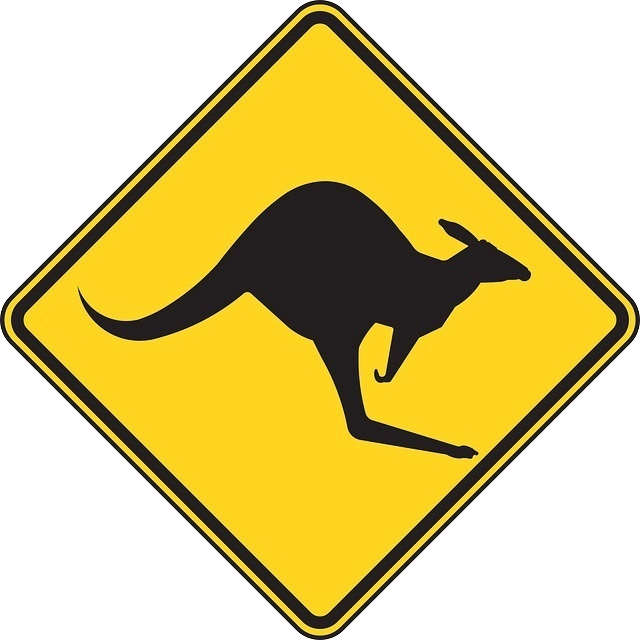

In [ ]:
# Split the color channels from the original image.
bk, gk, rk = cv2.split(img_kang)

# Add the "mask" as the 4th channel.
mat = [bk, gk, rk, kang_inv_mask_full]

# Use the merge() function to create a single multi-channel array.
kangaroo_transparent = cv2.merge(mat)

# Save the transparent image as a PNG file to preserve the alpha channel.
cv2.imwrite('kangaroo_alpha_full.png', kangaroo_transparent)

# Display the PNG file we just created.
Image(filename = "kangaroo_alpha_full.png", width = '300')

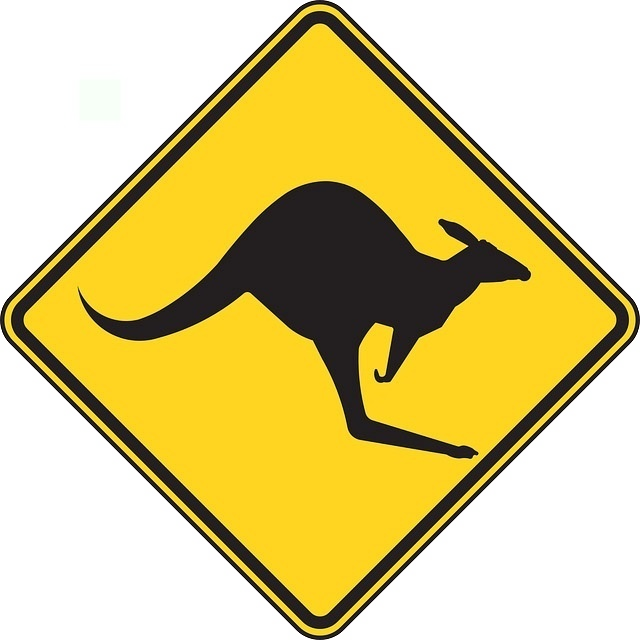

In [ ]:
# Split the color channels from the original image.
bk, gk, rk = cv2.split(img_kang)

# Add the "mask" as the 4th channel.
mat = [bk, gk, rk, kang_inv_mask_semi]

# Use the merge() function to create a single multi-channel array.
kangaroo_semi = cv2.merge(mat)

# Save the transparent image as a PNG file to preserve the alpha channel.
cv2.imwrite('kangaroo_alpha_semi.png', kangaroo_semi)

# Display the PNG file we just created.
Image(filename = "kangaroo_alpha_semi.png", width = '300')

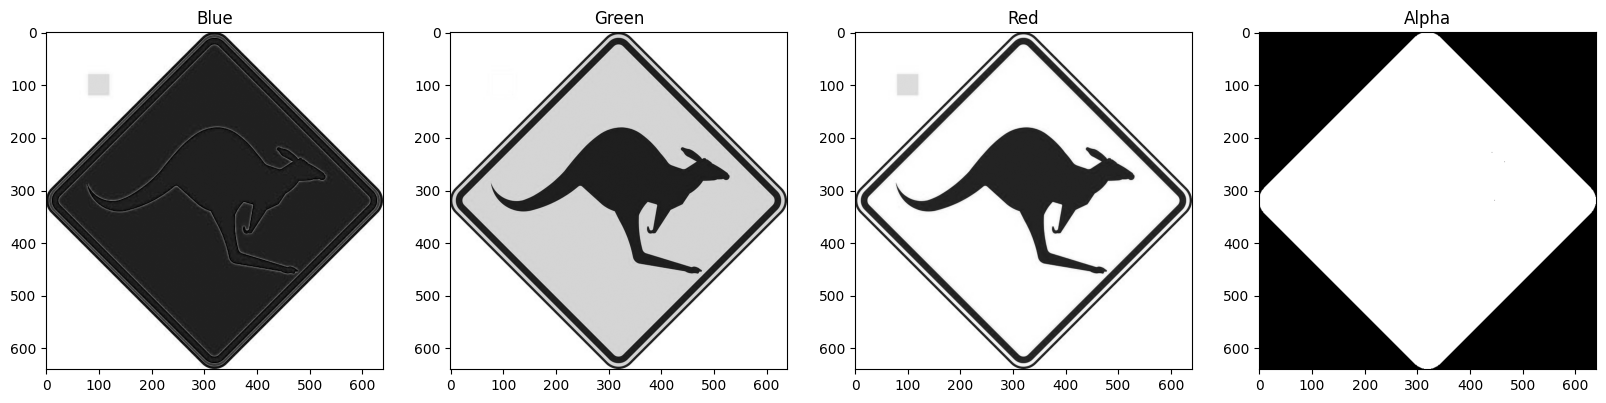

In [ ]:
# Read the PNG image using: cv2.IMREAD_UNCHANGED to retain the alpha channel.
img = cv2.imread('kangaroo_alpha_full.png', cv2.IMREAD_UNCHANGED)

# Split the channels.
b, g, r, a = cv2.split(img)

# Display each of the channels.
plt.figure(figsize = (20,15))
plt.subplot(141); plt.imshow(b); plt.title('Blue')
plt.subplot(142); plt.imshow(g); plt.title('Green')
plt.subplot(143); plt.imshow(r); plt.title('Red')
plt.subplot(144); plt.imshow(a); plt.title('Alpha');